<a href="https://colab.research.google.com/github/clustering-jun/KMU-Data_Science/blob/main/L10_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Network Analysis Practice**

## **Data**
- Wikipedia 하이퍼링크 네트워크
 - 방향 그래프
 - 노드 수: 4,604
 - 간선 수: 119,882

- https://snap.stanford.edu/data/wikispeedia.html

```
!wget https://snap.stanford.edu/data/wikispeedia/wikispeedia_paths-and-graph.tar.gz
!tar xvfz wikispeedia_paths-and-graph.tar.gz
```



In [2]:
!wget https://snap.stanford.edu/data/wikispeedia/wikispeedia_paths-and-graph.tar.gz
!tar xvfz wikispeedia_paths-and-graph.tar.gz

--2025-08-05 09:31:28--  https://snap.stanford.edu/data/wikispeedia/wikispeedia_paths-and-graph.tar.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9901821 (9.4M) [application/x-gzip]
Saving to: ‘wikispeedia_paths-and-graph.tar.gz’

wikispeedia_paths-a 100%[===================>]   9.44M  4.22MB/s    in 2.2s    

2025-08-05 09:31:30 (4.22 MB/s) - ‘wikispeedia_paths-and-graph.tar.gz’ saved [9901821/9901821]

wikispeedia_paths-and-graph/
wikispeedia_paths-and-graph/paths_finished.tsv
wikispeedia_paths-and-graph/paths_unfinished.tsv
wikispeedia_paths-and-graph/articles.tsv
wikispeedia_paths-and-graph/categories.tsv
wikispeedia_paths-and-graph/links.tsv
wikispeedia_paths-and-graph/shortest-path-distance-matrix.txt


In [3]:
!head -n 20 wikispeedia_paths-and-graph/articles.tsv # nodes
!head -n 20 wikispeedia_paths-and-graph/links.tsv # edges

# The list of all articles.
# Article names are URL-encoded; e.g., in Java they can be decoded using java.net.URLDecoder.decode(articleName, "UTF-8").
# FORMAT:   article
#
# When publishing on this data set, please cite:
# (1) Robert West and Jure Leskovec:
#     Human Wayfinding in Information Networks.
#     21st International World Wide Web Conference (WWW), 2012.
# (2) Robert West, Joelle Pineau, and Doina Precup:
#     Wikispeedia: An Online Game for Inferring Semantic Distances between Concepts.
#     21st International Joint Conference on Artificial Intelligence (IJCAI), 2009.

%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
%C3%85land
%C3%89douard_Manet
%C3%89ire
%C3%93engus_I_of_the_Picts
%E2%82%AC2_commemorative_coins
10th_century
11th_century
# The list of all links between articles.
# Article names are URL-encoded; e.g., in Java they can be decoded using java.net.URLDecoder.decode(articleName, "UTF-8").
# FORMAT:   linkSource   linkTarget
#
# When publishing on this data set, please cite

In [4]:
from urllib.parse import unquote

unquote('%C3%81ed%C3%A1n_mac_Gabr%C3%A1in')

'Áedán_mac_Gabráin'

## **그래프 만들기**

In [5]:
import networkx as nx
from urllib.parse import unquote

G = nx.DiGraph()

for line in open('wikispeedia_paths-and-graph/articles.tsv', 'r'):
    line = line.strip()
    if line == "" or line[0] == '#':
        continue

    G.add_node(unquote(line))

for line in open('wikispeedia_paths-and-graph/links.tsv', 'r'):
    line = line.strip()
    if line == "" or line[0] == '#':
        continue

    u,v = line.split()
    u = unquote(u)
    v = unquote(v)

    G.add_edge(u, v)

In [6]:
n_nodes = len(G.nodes) # node의 개수
n_edges = len(G.edges()) # edge의 개수

# density
density = nx.density(G)
density1 = n_edges / (n_nodes * (n_nodes-1))

# triangles
triangles = sum(nx.triangles(G.to_undirected()).values()) // 3


print('n_nodes:', n_nodes)
print('n_edges:', n_edges)
print('density:', density)
print('triangles:', triangles)

n_nodes: 4604
n_edges: 119882
density: 0.0056568894271159615
triangles: 550545


## **Centrality 계산**

In [7]:
degree = nx.degree_centrality(G)
indegree = nx.in_degree_centrality(G)
outdegree = nx.out_degree_centrality(G)
betweenness = nx.betweenness_centrality(G, 200)
closeness = nx.closeness_centrality(G)
pagerank = nx.pagerank(G)
clustering = nx.clustering(G)
triangles = nx.triangles(G.to_undirected())

print(degree)
print(indegree)
print(outdegree)
print(betweenness)
print(closeness)
print(pagerank)
print(clustering)
print(triangles)

# 더 큰 그래프로 가면 연산량이 너무 많고 python은 느리기 때문에 C++이나 Java를 사용함
# Java 라이브러리- neo4j를 사용하거나, 직접 구현

{'Áedán_mac_Gabráin': 0.0023897458179448186, 'Åland': 0.004127742776450141, 'Édouard_Manet': 0.004344992396263307, 'Éire': 0.0017379969585053225, 'Óengus_I_of_the_Picts': 0.0021724961981316533, '€2_commemorative_coins': 0.01021073213121877, '10th_century': 0.019769715402998045, '11th_century': 0.02281121008038236, '12th_century': 0.02824245057571149, '13th_century': 0.025635455137953508, '14th_century': 0.022159461220942863, '15th_Marine_Expeditionary_Unit': 0.005431240495329133, '15th_century': 0.034108190310666954, '16_Cygni': 0.0021724961981316533, '16_Cygni_Bb': 0.002824245057571149, '16th_century': 0.04692591787964371, '1755_Lisbon_earthquake': 0.005865739734955464, '17th_century': 0.04649141864001738, '1896_Summer_Olympics': 0.006300238974581794, '18th_century': 0.05800564849011514, '1928_Okeechobee_Hurricane': 0.005213990875515968, '1973_oil_crisis': 0.014772974147295241, '1980_eruption_of_Mount_St._Helens': 0.009993482511405605, '1997_Pacific_hurricane_season': 0.00369324353682

In [8]:
print('Deg Rank')
for line in sorted(degree.items(), key = lambda x:-x[1])[:10]:
    print(line)

print('\nIn-Deg Rank')
for line in sorted(indegree.items(), key = lambda x:-x[1])[:10]:
    print(line)

print('\nOut-Deg Rank')
for line in sorted(outdegree.items(), key = lambda x:-x[1])[:10]:
    print(line)

print('\nBetweenness Rank')
for line in sorted(betweenness.items(), key = lambda x:-x[1])[:10]:
    print(line)

print('\nCloseness Rank')
for line in sorted(closeness.items(), key = lambda x:-x[1])[:10]:
    print(line)

print('\nPageRank Rank')
for line in sorted(pagerank.items(), key = lambda x:-x[1])[:10]:
    print(line)

print('\nClustering Rank')
for line in sorted(clustering.items(), key = lambda x:-x[1])[:10]:
    print(line)

print('\nTriangles Rank')
for line in sorted(triangles.items(), key = lambda x:-x[1])[:10]:
    print(line)

Deg Rank
('United_States', 0.40082554855529)
('United_Kingdom', 0.24766456658700847)
('Europe', 0.23723658483597654)
('France', 0.2268086030849446)
('England', 0.2005213990875516)
('Germany', 0.19813165326960677)
('World_War_II', 0.18900716923745384)
('English_language', 0.15555072778622636)
('India', 0.1503367369107104)
('Africa', 0.1496849880512709)

In-Deg Rank
('United_States', 0.3369541603302194)
('United_Kingdom', 0.21116663045839668)
('France', 0.20834238540082553)
('Europe', 0.20269389528568324)
('England', 0.16315446447968715)
('World_War_II', 0.16315446447968715)
('Germany', 0.16141646752118183)
('India', 0.132739517705844)
('English_language', 0.12991527264827285)
('London', 0.12752552683032803)

Out-Deg Rank
('United_States', 0.0638713882250706)
('Driving_on_the_left_or_right', 0.05539865305235715)
('List_of_countries', 0.05300890723441234)
('List_of_circulating_currencies', 0.051270910275907015)
('List_of_sovereign_states', 0.04692591787964371)
('Africa', 0.046056919400391

## **Centrality 사이의 관계 분석**
- 각 centrality 결과를 리스트 형식으로 변환

In [9]:
nodes = G.nodes()

deg_arr = [degree[node] for node in nodes]
indeg_arr = [indegree[node] for node in nodes]
outdeg_arr = [outdegree[node] for node in nodes]
betweenness_arr = [betweenness[node] for node in nodes]
closeness_arr = [closeness[node] for node in nodes]
pagerank_arr = [pagerank[node] for node in nodes]
clustering_arr = [clustering[node] for node in nodes]
triangles_arr = [triangles[node] for node in nodes]

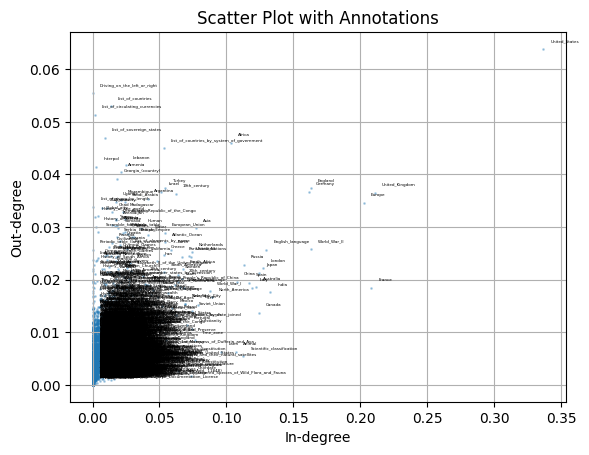

In [31]:
import matplotlib.pyplot as plt

labels = list(nodes)

for node in nodes:
    if indegree[node] > 0.25:
        for x, y, label in zip(indeg_arr, outdeg_arr, labels):
            plt.annotate(label, (x, y), textcoords="offset points", xytext=(5,5), ha='left', fontsize=3)

plt.xlabel('In-degree')
plt.ylabel('Out-degree')
plt.title('Scatter Plot with Annotations')
plt.grid(True)

plt.scatter(indeg_arr, outdeg_arr, s=1, alpha=0.3)
plt.show()

In [17]:
for node in nodes:
    if indegree[node] > 0.2 and outdegree[node] < 0.03:
        print(node)

France


- Seaborn을 사용하여 간단하게 그리기

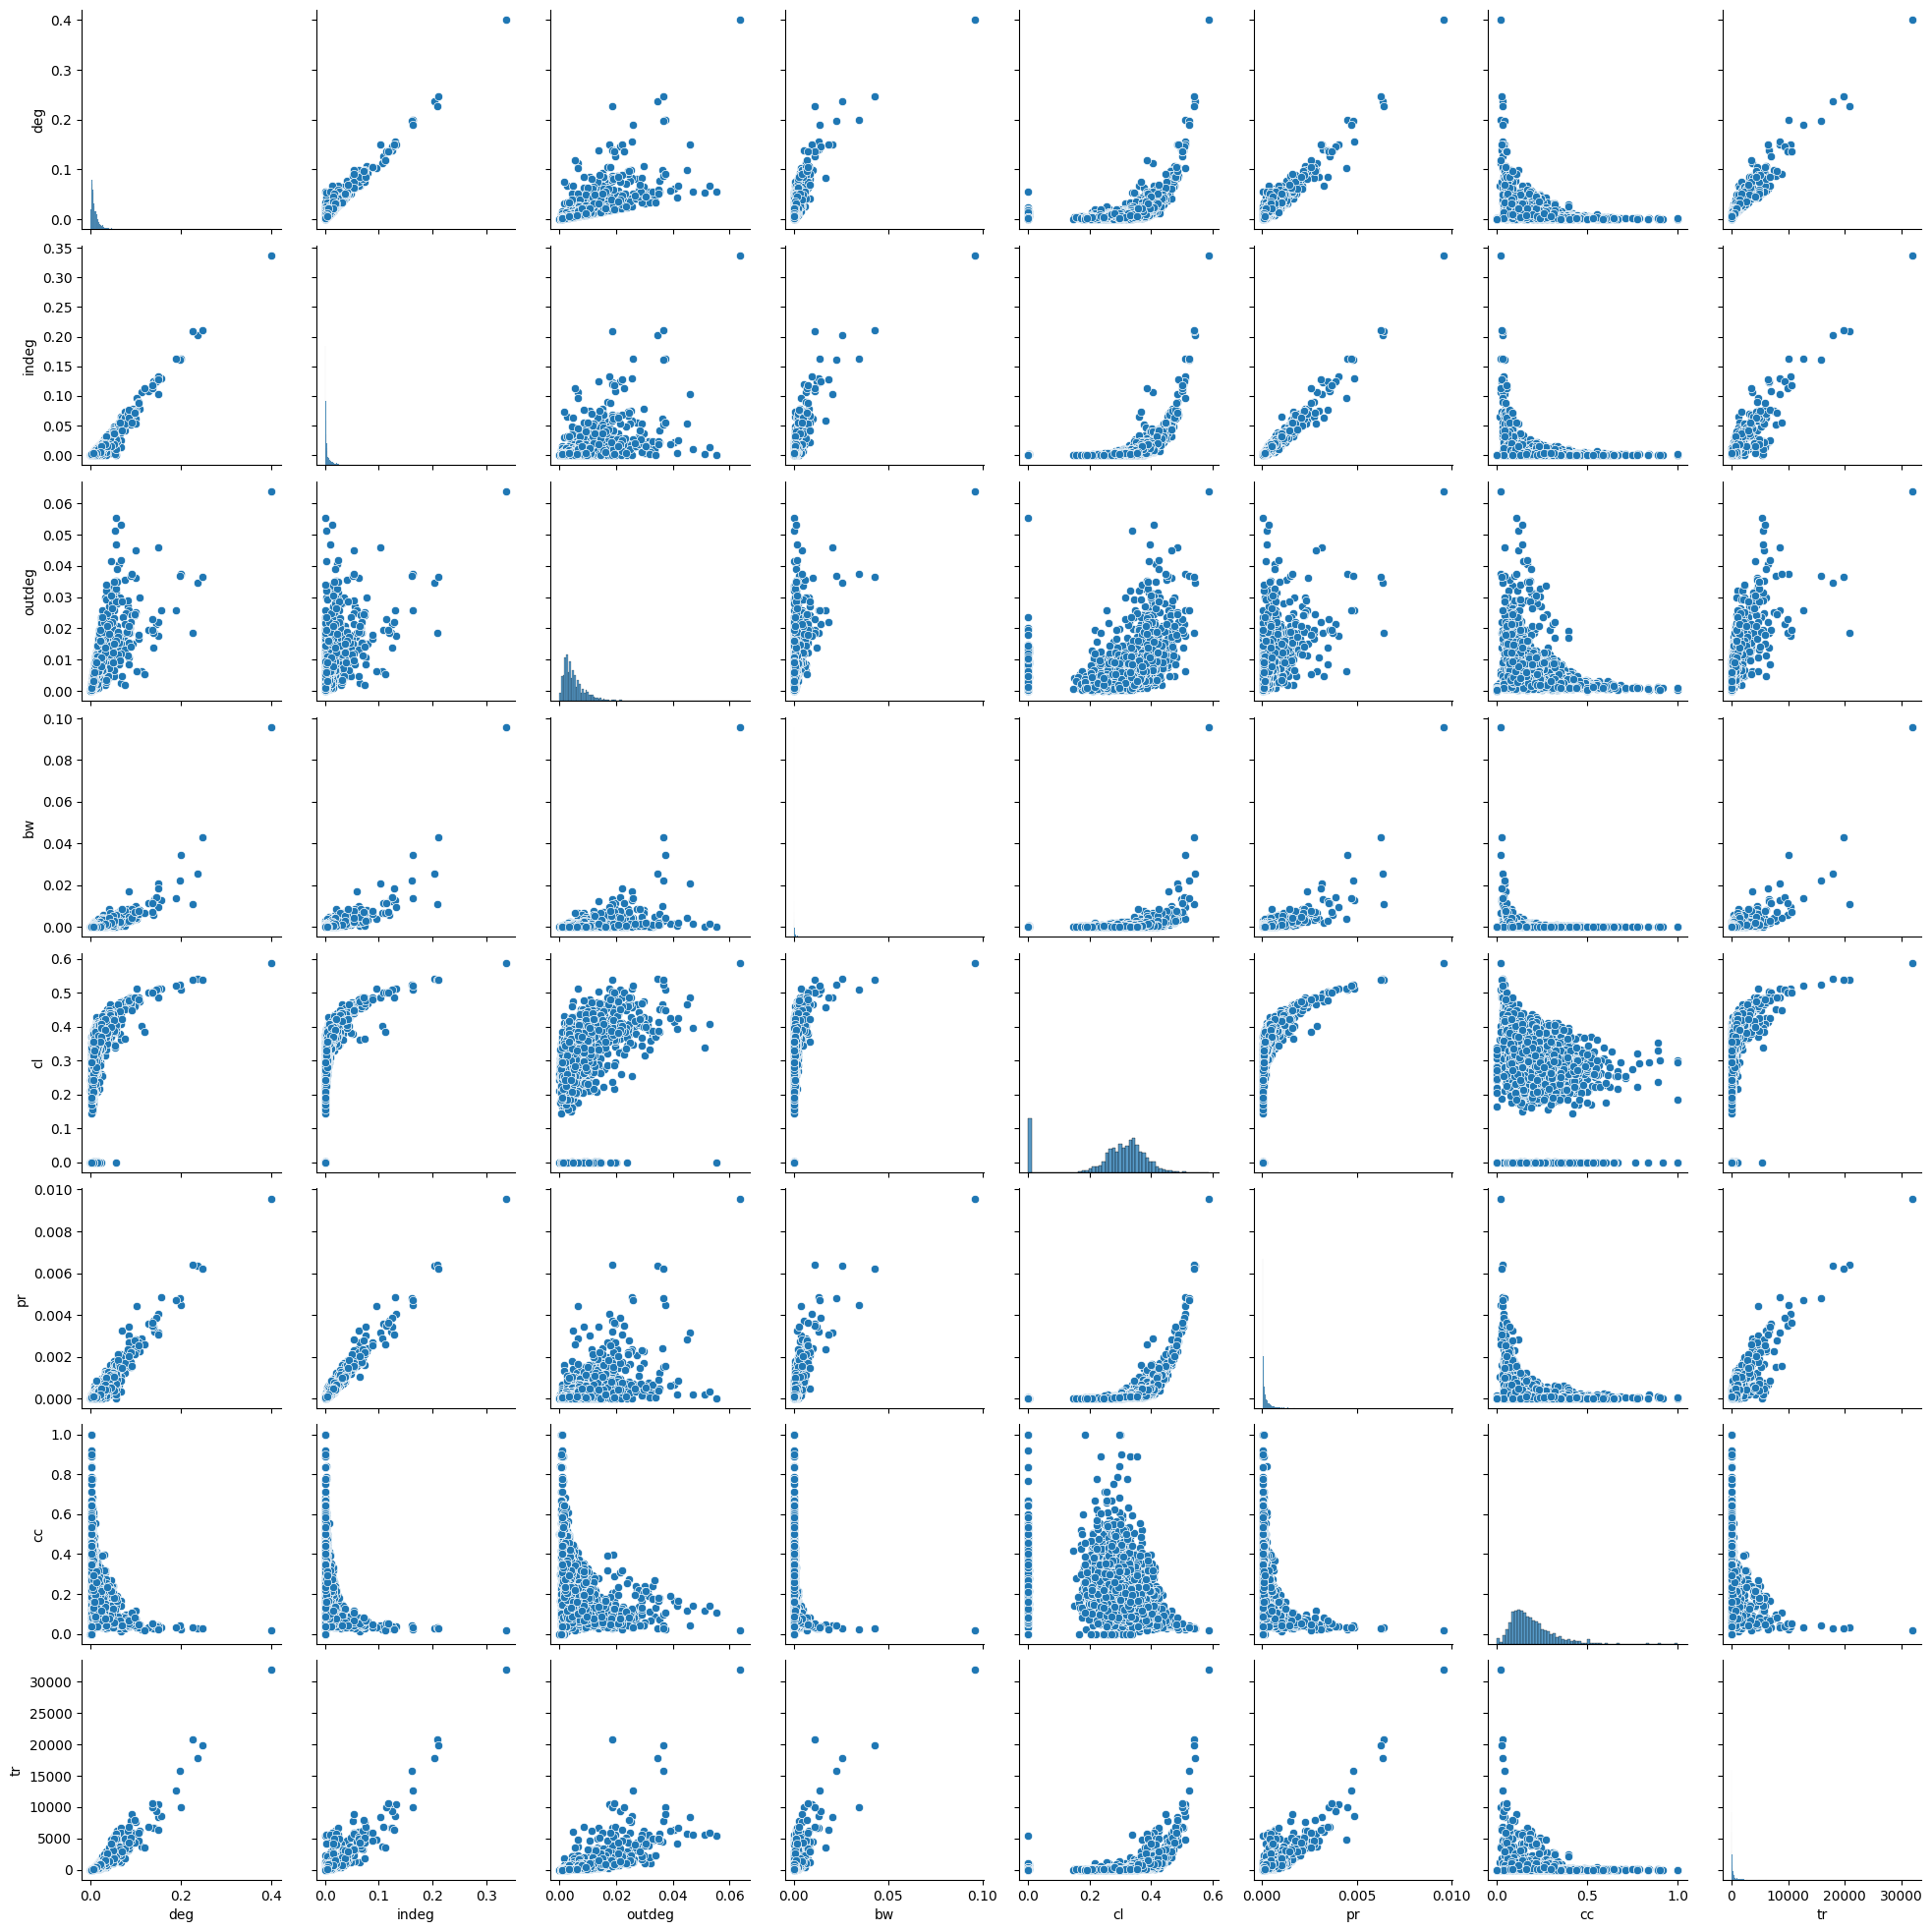

In [39]:
import seaborn as sns
import pandas as pd
import numpy as np

a = np.array([deg_arr, indeg_arr, outdeg_arr, betweenness_arr, closeness_arr, pagerank_arr, clustering_arr, triangles_arr]).T
df = pd.DataFrame(a, columns=['deg','indeg','outdeg','bw','cl','pr','cc','tr'])
sns.pairplot(df)
plt.show()